#<center>**Machine Learning Pipeline - MNIST Dataset**</center>

<center><img src="https://raw.githubusercontent.com/yashk2810/yashk2810.github.io/master/images/mnist.png"></center>
<center>Image Source: https://raw.githubusercontent.com/yashk2810/yashk2810.github.io/master/images/mnist.png</center>

In this notebook, we will practice creating a pipeline for solving a machine learning problem. The notebook will include common steps required for solving a machine learning problem such as: data reading, data visualization, data processing, feature engineering, and algorithm selection. 

We will use the famous MNIST dataset. The MNIST dataset is very suitable for experimenting different machine learning techniques to learn how they work and compare them. The main goal of the problem is to classify digits from handwritten images. 

As mentioned on a Kaggle competition for the MNIST data: "MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike".

This is the link to a GettingStarted Prediction Competition on the MNIST dataset named "Digit Recognizer": https://www.kaggle.com/competitions/digit-recognizer. You can check the notebooks, solutions, and discussions included in the competition to help you in learning the different approaches in solving a machine learning problem. You may also try to create your own solution, submit it, and see how it works!

The original source and information of the dataset can be found here: http://yann.lecun.com/exdb/mnist/index.html 

The image below shows the general pipeline for a machine learning project. In the notebook, we will try to show parts of this pipeline on the MNIST dataset. 

<center><img src="https://miro.medium.com/max/842/1*CyK1miQfy1OHmv2wUcjT1w.png"></center>
<center>Image Source: https://miro.medium.com/max/842/1*CyK1miQfy1OHmv2wUcjT1w.png</center>

So, let's get started!

# Step 1: Data Preparation, Reading, and Visualization

The first step in any machine learning problem is reading and visualizing the data to make sure you understand it and its structure. 

The datasets can be downloaded from different sources.

1.   You can download the original dataset files from its original source such as this one for MNIST dataset: http://yann.lecun.com/exdb/mnist/index.html. You can find a lot of datasets for different ML problems on this website: https://openml.org/. In this case, you need to manually save and read the files from their path to work on them. 

2.   You can download the data from available packages such as: sklearn.datasets (https://scikit-learn.org/stable/datasets.html), keras.datasets (https://keras.io/api/datasets/), tensorflow_datasets (https://www.tensorflow.org/datasets), and you may also find others. When you load the datasets from these packages, you have two options. The first is working on your PC, and in this case, the dataset files is usually downloaded in a specific path on your PC. The second option is working on Google Colab, and in this case, Colab deals with the issue of loading and saving the data on their servers. So, you do not save or keep a copy of the dataset. You just call and use the dataset whenever you want.

So, let's read and visualize the MNIST datasets!




In [1]:
#Loading the MNIST data from sklearn.datasets package

from sklearn.datasets import fetch_openml

mnist_data = fetch_openml('mnist_784')

In [2]:
#Visualizing the structure of the loaded data

mnist_data

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

From the output of the cell above, we can see that dataset consists of 70000 samples and 784 features. The 784 features represents the number of pixels per image (28*28). The samples and features are saved in 'data'. And the labels of these samples are saved in 'target'. The labels take the values from 0 to 9 corresponding to the 10 classes of the 10 digits from 0 to 9. You can further check and explore the data structure above. 

The next step we can do is reshaping the data to the form of images and visualize these images.

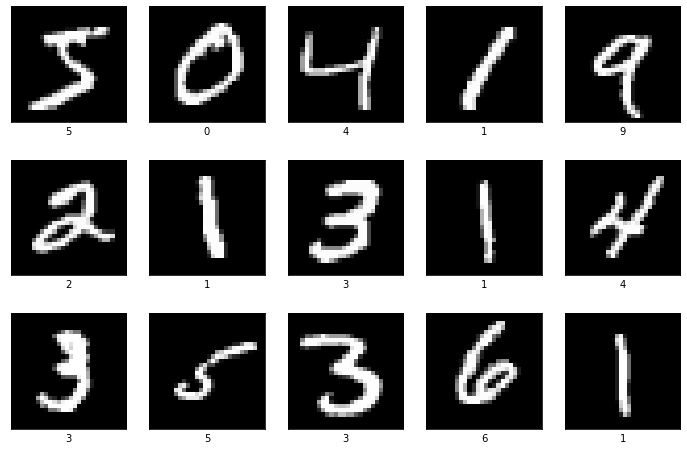

In [3]:
#Reshaping the data and visualizing the images

import numpy as np
import matplotlib.pyplot as plt

mnist_data_arr = np.array(mnist_data.data)
mnist_images = np.reshape(mnist_data_arr, (70000, 28, 28))

fig, ax = plt.subplots(3, 5, figsize=(12, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist_images[i], cmap='gray')
    axi.set(xticks=[], yticks=[],xlabel=mnist_data.target.values[i])

After visualizing our images, we can check the numerical values used in representing each image. 

In [4]:
#Displaying the numerical values of the images

print(mnist_images[0])

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

From the above display, we can see that the scale of the images is from 0 to 255. 

Now, let's see the structure of the labels to know how the labels are organized. This may help us if we need to divide the data in a specific way for training, validation, and testing purposes.

In [5]:
#Printing the first 900 sample of the labels to see their structure

print(mnist_data.target.values[:900])

['5', '0', '4', '1', '9', ..., '3', '4', '4', '7', '5']
Length: 900
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


After printing the labels structure, we can notice that first, we need to convert the target to numpy array for easier data reading and manipulation. 

In [6]:
#Converting the labels array to numpy array

mnist_labels = np.array(mnist_data.target.values)
print(mnist_labels[0:900])

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7' '2' '8'
 '6' '9' '4' '0' '9' '1' '1' '2' '4' '3' '2' '7' '3' '8' '6' '9' '0' '5'
 '6' '0' '7' '6' '1' '8' '7' '9' '3' '9' '8' '5' '9' '3' '3' '0' '7' '4'
 '9' '8' '0' '9' '4' '1' '4' '4' '6' '0' '4' '5' '6' '1' '0' '0' '1' '7'
 '1' '6' '3' '0' '2' '1' '1' '7' '9' '0' '2' '6' '7' '8' '3' '9' '0' '4'
 '6' '7' '4' '6' '8' '0' '7' '8' '3' '1' '5' '7' '1' '7' '1' '1' '6' '3'
 '0' '2' '9' '3' '1' '1' '0' '4' '9' '2' '0' '0' '2' '0' '2' '7' '1' '8'
 '6' '4' '1' '6' '3' '4' '5' '9' '1' '3' '3' '8' '5' '4' '7' '7' '4' '2'
 '8' '5' '8' '6' '7' '3' '4' '6' '1' '9' '9' '6' '0' '3' '7' '2' '8' '2'
 '9' '4' '4' '6' '4' '9' '7' '0' '9' '2' '9' '5' '1' '5' '9' '1' '2' '3'
 '2' '3' '5' '9' '1' '7' '6' '2' '8' '2' '2' '5' '0' '7' '4' '9' '7' '8'
 '3' '2' '1' '1' '8' '3' '6' '1' '0' '3' '1' '0' '0' '1' '7' '2' '7' '3'
 '0' '4' '6' '5' '2' '6' '4' '7' '1' '8' '9' '9' '3' '0' '7' '1' '0' '2'
 '0' '3' '5' '4' '6' '5' '8' '6' '3' '7' '5' '8' '0

Now, the labels are saved in a numpy array. another step we can do is converting the labels from type 'strings' to 'integers' (this is an optional step as usually the classifier can deal with class labels in the type of 'strings').

In [7]:
#Converting the labels from strings to integers

mnist_labels = np.array(mnist_data.target.values).astype(int)
print(mnist_labels[:900])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6
 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3 6 4 7
 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5 7 4 1 3 4 0 4 8
 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6 7 2 0 3 5 4 3 6 5
 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0 2 3 9 4 9 2 1 6 8 4
 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6 5 1 1 0 2 6 4 5 8 3 1
 5 1 9 2 7 4 4 4 8 1 5 8 9 5 6 7 9 9 3 7 0 9 0 6 6 2 3 9 0 7 5 4 8 0 9 4 1
 2 8 7 1 2 6 1 0 3 0 1 1 8 2 0 3 9 4 0 5 0 6 1 7 7 8 1 9 2 0 5 1 2 2 7 3 5
 4 9 7 1 8 3 9 6 0 3 1 1 

Now, let's visualize the distribution of the classes to check if there is imbalance in the data. 

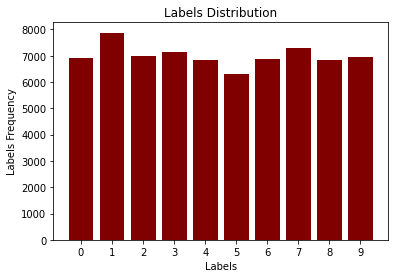

In [8]:
#Visualizing the distribution of the classes

labels_names, labels_counts = np.unique(mnist_labels,  return_counts=True)
plt.bar(labels_names, labels_counts, color ='maroon', tick_label=labels_names);
plt.xlabel("Labels");
plt.ylabel("Labels Frequency");
plt.title("Labels Distribution");

We can see that the data is balanced. So, we do not need to do any processing to deal with data imbalance. There are multiple other checks you can do on the data before starting building your solutions. For example, depending on the dataset type, you may need to check the following: statistics of numerical or categorical features, presence of missing values or outliers, and others depending on your dataset.

# Step 2: Building a Baseline Model

The second step that can be done is building a baseline model for classifing the data using the raw data without any preprocessing or feature engineering. This baseline model can give an indication of the baseline result that can be achieved with a basic model and without preprocessing. 

So, in this step, we will use the raw data with a linear SVM classifier.

The first question we need to answer is how we will represent the data. In our case, using the SVM classifier, we will represent the raw data using a separate feature for each pixel. This means that we will have 784 features for each image/sample. This was how the data was loaded originally. For the sake of simplicity and computational time, we will use only 10,000 samples out of the 70,000 samples. The 10,000 will be enough for exploring the whole pipeline. You can use a different number of samples by changing the variable 'samples_num' below. 

In [9]:
#Preparing the data to be used with the classifier

samples_num = 10000

mnist_data_classify = mnist_data_arr[:samples_num, :].copy()
mnist_labels_classify = mnist_labels[:samples_num]
mnist_data_classify.shape, mnist_labels_classify.shape

((10000, 784), (10000,))

The next question we need to answer is how we will split the data. We can split the data into training, validation, or testing sets. And in some cases, we can split it into training and testing sets. In complex problems and huge datasets, we should usually use a validation set. But for the simple case of our problem, we will split the data into only training and testing sets. 

There are multiple strategies for splitting the data that depend on the type of the data (such as balanced or imbalanced data). Examples of these strategies are: random splitting, stratified splitting, and group splitting. Given that our data is the normal case of a balanced data, we will go for the normal random splitting. You can also use K-Folds or Leave-One-Out cross-validation whenever needed for testing your model. 

In [10]:
#Splitting the data using random splitting

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(mnist_data_classify, mnist_labels_classify, random_state=42)

Xtrain.shape, Xtest.shape

((7500, 784), (2500, 784))

We can see from the output above that 'train_test_split' function divided the data into 75% training and 25% testing which is its default values. You can change this, if needed, based on your problem and objectives.

Now, we will build the classification pipeline. We will build the linear SVM model, fed the training data into the model, predict the labels of the testing data, and check the testing accuracy. 

In [11]:
#Building and testing a linear SVM classification model

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='linear') #Building the model
model.fit(Xtrain, ytrain) #Fitting the model with training data
yfit = model.predict(Xtest) #Predicting the testing data labels 
print(accuracy_score(ytest, yfit)) #Printing the classification accuracy achieved by the model on the testing data

0.9208


We are now done with our first trial of the classification model. We can see that we achieved an accuracy of 0.92 with using the raw data and a linear SVM classifier. This is a good accuracy given the simplicity of the data. On more complex datasets, the raw data and a classical model may not generate such a good result. But for our data, this is good for now. 

Now, we can display the confusion matrix to better understand the performance of our model. 

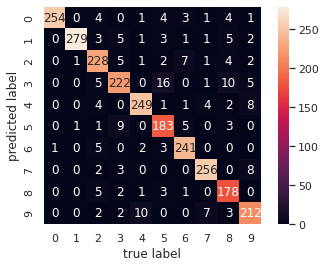

In [12]:
#Displaying the confusion matrix between the classes
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set() #Use seaborn plotting defaults

conf_mat = confusion_matrix(ytest, yfit)
sns.heatmap(conf_mat.T, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

From the confusion matrix above, we can notice two things. First, the classification accuracy is good across all the labels. Second, we can better understand the misclassifications done by the model. We can notice the following:

*   The misclassifications at the digits 3, 4, 5, 8, and 9 have more misclassifications than the other digits. The digit 0 has the least number of misclassifications.
*   The misclassifications of digit 3 are mostly because they wrongly predicted as letter 5. The same with digits 4 and 9, 5 and 3, 8 and 3, 9 and 4, and 9 and 7. This makes sense due to the possible similarity that could happen between these pairs of digits. 

This shows that the confusion matrix can help us to spot the points of failure of our algorithm. This observations would help us in improving our model. You can further check the misclassified samples and display their images to further understand the occurrence of these misclassifications. 

Now, after finishing our baseline model and getting an idea about its performance, we can move to trying to improving this model either by data preprocessing or feature engineering. 

Let's start with the data preprocessing!



# Step 3: Data Preprocessing for Accuracy Improvement

Data preprocessing usually helps in improving the accuracy of our model especially with complex datasets. Data preprocessing includes normalizing/standardizing/scaling of numerical features, imputing missing values, encoding of categorical features into numerical values, and others. The choice of suitable preprocessing methods depend on the dataset type and the objective to be achieved in the problem. 

So, what are the preprocessing methods that we can apply to our dataset? These are some preprocessing methods that we may try:

1. Binarizing the images to have only values 0 (black) or 1 (white) with no shade of gray. 
2. Resizing the images. 
3. Scaling the images to have values from 0 to 1 instead of 0 to 255. 
4. Applying edge detection algorithm on the images and use the images after the edge detection.

These are some ideas that we may check if they affect the classification accuracy or not. There is one more idea we can try, but we will discuss this later in the notebook. 

So, let's first check the effect of binarizing the images!








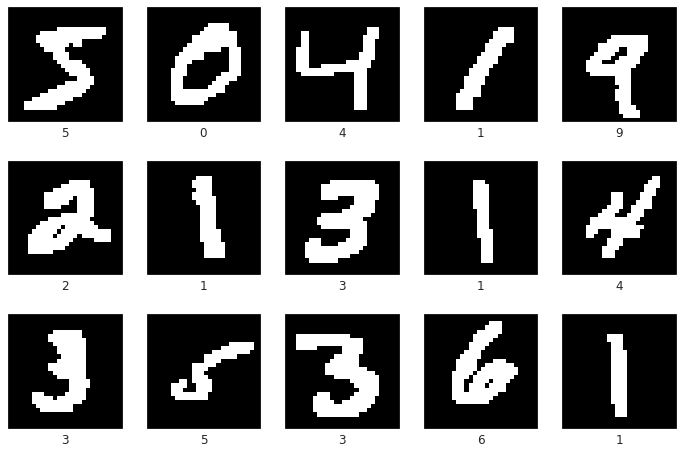

In [13]:
#Preparing and displaying the binarized data to be used with the classifier

mnist_data_classify_binary = mnist_data_classify.copy()
mnist_data_classify_binary[mnist_data_classify_binary > 0] = 1

mnist_images_binary = np.reshape(mnist_data_classify_binary, (samples_num, 28, 28))

fig, ax = plt.subplots(3, 5, figsize=(12, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist_images_binary[i], cmap='gray')
    axi.set(xticks=[], yticks=[],xlabel=mnist_data.target.values[i])

The above images show the binarized versions of the MNIST images. Let's display the current numerical values representing the images to make sure it is zeros and ones.  

In [14]:
#Displaying the numerical values of the binarized images

print(mnist_images_binary[0])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0

We can see from the values displayed above that the images are represented in zeros and ones. Let's now test our linear SVM classifier on the binarized data.

In [15]:
#Testing a linear SVM classification model on the binarized version of the data

Xtrain, Xtest, ytrain, ytest = train_test_split(mnist_data_classify_binary, mnist_labels_classify, random_state=42) #Splitting the data
model = SVC(kernel='linear') #Building the model
model.fit(Xtrain, ytrain) #Fitting the model with training data
yfit = model.predict(Xtest) #Predicting the testing data labels 
print(accuracy_score(ytest, yfit)) #Printing the classification accuracy achieved by the model on the testing data

0.9084


We can see from the accuracy achieved above that binarizing the images did not improve the accuracy of our model, but the accuracy decreased slightly from 0.92 to 0.91. So, this result means that this preprocessing step is better not to be used in our problem.  

Let's now try another preprocessing step which is resizing our original images. We can try to decrease or increase the size of the images and see the resizing effect on the accuracy. For the purpose of this notebook, we will test decreasing the size of the images to 20 by 20. You can test more values if needed by changing the resize variable 'new_size' in the code below. 

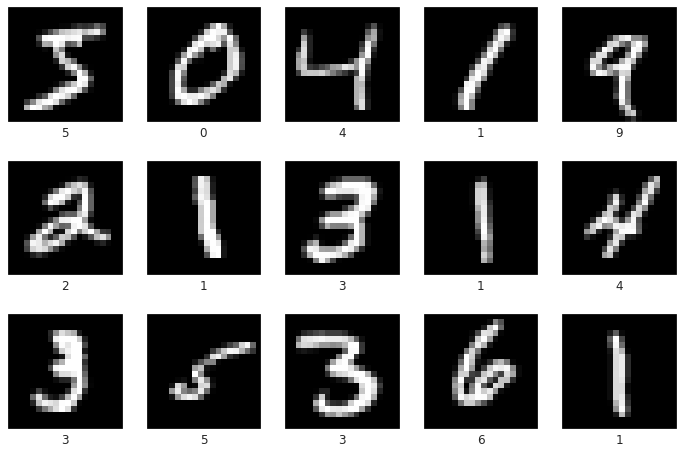

In [16]:
#Preparing and displaying the resized data to be used with the classifier

from skimage.transform import resize

new_size = 20

mnist_images_classify = np.reshape(mnist_data_classify, (samples_num, 28, 28))
mnist_images_resize = np.zeros((samples_num, new_size, new_size))
for i in range(samples_num):
  mnist_images_resize[i, :, :] = resize(mnist_images_classify[i, :, :], (new_size, new_size), preserve_range=True)

fig, ax = plt.subplots(3, 5, figsize=(12, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist_images_resize[i], cmap='gray')
    axi.set(xticks=[], yticks=[],xlabel=mnist_data.target.values[i])

Let's now test our linear SVM classifier on the resized data.


In [17]:
#Testing a linear SVM classification model on the resized version of the data

mnist_data_classify_resize = np.reshape(mnist_images_resize, (samples_num, new_size*new_size))
Xtrain, Xtest, ytrain, ytest = train_test_split(mnist_data_classify_resize, mnist_labels_classify, random_state=42) #Splitting the data
model = SVC(kernel='linear') #Building the model
model.fit(Xtrain, ytrain) #Fitting the model with training data
yfit = model.predict(Xtest) #Predicting the testing data labels 
print(accuracy_score(ytest, yfit)) #Printing the classification accuracy achieved by the model on the testing data

0.9132


We can see from the accuracy achieved above that resizing the images did not improve the accuracy of our model, but the accuracy decreased slightly from 0.9208 to 0.9132. So, this result means that this preprocessing step is better not to be used in our problem.   

Let's now try rescaling our images from 0 to 1 and see the rescaling effect on the accuracy. There are different ways of normalization and standardization. In our test below, we will use the MinMaxScaler. You can can also try other different methods. You can check the different methods here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing. 

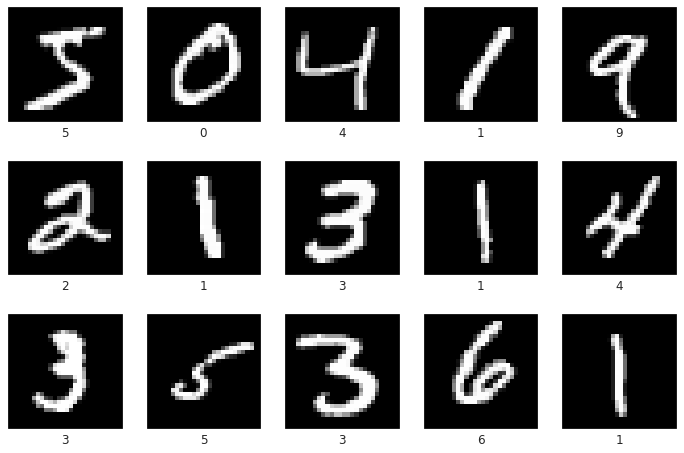

In [18]:
#Preparing and displaying the rescaled data to be used with the classifier

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
mnist_data_classify_rescale = mnist_data_classify.copy()
mnist_data_classify_rescale = scaler.fit_transform(mnist_data_classify_rescale)
#You can also implement the rescaling manually using this line of code: mnist_data_classify_rescale = mnist_data_classify/255
mnist_images_rescale = np.reshape(mnist_data_classify_rescale, (samples_num, 28, 28))

fig, ax = plt.subplots(3, 5, figsize=(12, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist_images_rescale[i], cmap='gray')
    axi.set(xticks=[], yticks=[],xlabel=mnist_data.target.values[i])

As we can see from the images above, the images look the same as the original ones. The only difference is the scale of the values which is now from 0 to 1 instead of 0 to 255. With some algorithms (such as neural networks), this rescaling is important and affect the model's accuracy. Let's display below the values after rescaling.

In [19]:
#Displaying the numerical values of the rescaled images

print(mnist_images_rescale[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

We can see from the values displayed above that the images are represented represented in the range from zero to and one. Let's now test our linear SVM classifier on the rescaled data.

In [20]:
#Testing a linear SVM classification model on the rescaled version of the data

Xtrain, Xtest, ytrain, ytest = train_test_split(mnist_data_classify_rescale, mnist_labels_classify, random_state=42) #Splitting the data
model = SVC(kernel='linear') #Building the model
model.fit(Xtrain, ytrain) #Fitting the model with training data
yfit = model.predict(Xtest) #Predicting the testing data labels 
print(accuracy_score(ytest, yfit)) #Printing the classification accuracy achieved by the model on the testing data

0.9248


We can see from the accuracy achieved above that rescaling the images have a slight improvement effec on the accuracy of our model. The accuracy increased from 0.9208 to 0.9248. So, this result means that this preprocessing step could be used in our problem. 

Let's now try applying edge detection on our images and check its effect on the accuracy. There are a lot of edge detection algorithms that can be used (such as Canny, Sobel, HOG, and others). We will test the Canny edge detector. You can also test other edge detectors. You can find multiple algorithms on this link: https://scikit-image.org/docs/stable/api/skimage.feature.html

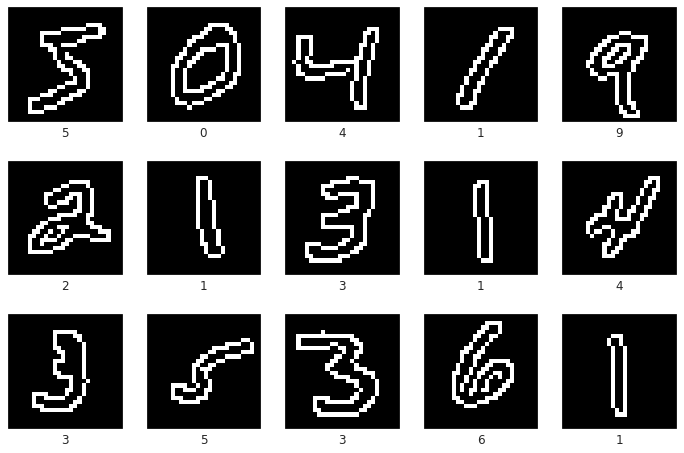

In [21]:
#Preparing and displaying the data after applying Canny edge detector to the images

from skimage.feature import canny

mnist_images_classify = np.reshape(mnist_data_classify, (samples_num, 28, 28))
mnist_images_edge = np.zeros((samples_num, 28, 28))

for i in range(samples_num):
  mnist_images_edge[i, :, :] = canny(mnist_images_classify[i, :, :])

fig, ax = plt.subplots(3, 5, figsize=(12, 8))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist_images_edge[i], cmap='gray')
    axi.set(xticks=[], yticks=[],xlabel=mnist_data.target.values[i])

We can see from the displayed images above the transformation of the images after edge detection. Let's now test our linear SVM classifier on the data after edge detection.

In [22]:
#Testing a linear SVM classification model on the data after applying Canny edge detection

mnist_data_classify_edge = np.reshape(mnist_images_edge, (samples_num, 28*28))
Xtrain, Xtest, ytrain, ytest = train_test_split(mnist_data_classify_edge, mnist_labels_classify, random_state=42) #Splitting the data
model = SVC(kernel='linear') #Building the model
model.fit(Xtrain, ytrain) #Fitting the model with training data
yfit = model.predict(Xtest) #Predicting the testing data labels 
print(accuracy_score(ytest, yfit)) #Printing the classification accuracy achieved by the model on the testing data

0.8516


We can see from the accuracy achieved above that applying Canny edge detection to the images did not improve the accuracy of our model, but the accuracy decreased significantly from 0.92 to 0.85. This means that the edge detection seems to remove important information from the images that is important to the classifier. So, this result means that this preprocessing step should not be used in our problem.

Now, we have tried 4 different preprocessing methods. One of them (rescaling) improved slightly the model accuracy, but the other three decreased the accuracy. Is it possible to find another preprocessing method that can have a significant effect on the results? Is there a preprocessing method that could be more suitable to our data more than the above methods we have tried? 

The answer is yes! We can think of a preprocessing method by looking at the images as we did in the Data Exploration step. If we looked again at the images, we can see that some digits in the images are skewed. This skeweness in the images could be affecting the accuracy negatively. So, "Deskewing" the images could lead to an improvement in the accuracy. 

You can find more on this link about "Deskewing" MNIST data: https://fsix.github.io/mnist/Deskewing.html. As mentioned in the link: "Deskewing is the process of straightening an image that has been scanned or written crookedly — that is an image that is slanting too far in one direction, or one that is misaligned".

So, let's try to preprocess our images by deskewing them!

In [23]:
#Define some functions to be used for deskewing process
#This cell is copied from: https://fsix.github.io/mnist/Deskewing.html

from scipy.ndimage import interpolation

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)

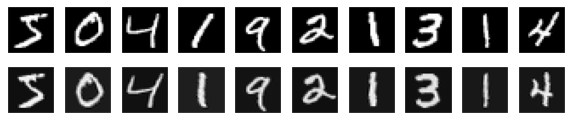

In [24]:
#Preparing and displaying the images before and after deskewing 

mnist_images_classify = np.reshape(mnist_data_classify, (samples_num, 28, 28))
mnist_images_deskew = np.zeros((samples_num, 28, 28))

for i in range(samples_num):
  mnist_images_deskew[i, :, :] = deskew(mnist_images_classify[i, :, :])

fig, ax = plt.subplots(2, 10, figsize=(10, 2))
for i, axi in enumerate(ax.flat):
  if i < 10:
    axi.imshow(mnist_images[i], cmap='gray')
  else:
    axi.imshow(deskew(mnist_images[i-10]), cmap='gray')
  axi.set(xticks=[], yticks=[])

We can see from the displayed images above the transformation of the images after deskewing them. Let's now test our linear SVM classifier on the data after the deskewing step.

In [25]:
#Testing a linear SVM classification model on the data after deskewing the images

mnist_data_classify_deskew = np.reshape(mnist_images_deskew, (samples_num, 28*28))
Xtrain, Xtest, ytrain, ytest = train_test_split(mnist_data_classify_deskew, mnist_labels_classify, random_state=42) #Splitting the data
model = SVC(kernel='linear') #Building the model
model.fit(Xtrain, ytrain) #Fitting the model with training data
yfit = model.predict(Xtest) #Predicting the testing data labels 
print(accuracy_score(ytest, yfit)) #Printing the classification accuracy achieved by the model on the testing data

0.9476


So, now, we have a significant increase in the accuracy!! The accuracy increased from **0.92 to 0.95 (3% increase)**! This result means that this preprocessing is essential to be applied to our data and it the most important one compared to all the other preprocessing steps! We can conclude that this preprocessing method is important because it is suitable to our data. This shows the importance of "Data Exploration" and choosing the preprocessing steps based on our understanding to the data we have in our problem.

To further increase the model accuracy, we can apply multiple preprocessing steps together. You can try combining multiple preprocessing steps and see its effect on the accuracy. Please note that you can combine preprocessing methods even if one of them did not work separately as it may work or have a positive effect on the accuracy when combined with other methods.

Now, after examining multiple preprocessing methods, we can move to trying feature engineering for increasing our accuracy. 

So, let's start with the feature engineering!

# Step 4: Feature Engineering for Accuracy Improvement

"Much of the success of machine learning is actually success in engineering features that a learner can understand". — Scott Locklin, in “Neglected machine learning ideas".

Feature Engineering is essential in machine learning. You can know more about Feature Engineering and its importance from this article: https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/ 

As mentioned in the article above, Feature Engineering can be defined as "the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data".

In this notebook, we will try two approaches of Feature Engineering to transform our raw data into other features that could better represent the problem. 

But before discussing our approaches, let's talk about the number of features used in our model. In all the models we have examined above, we have used 784 features. What if we need to decrease this number of features? Can we solve our problem with less number of features? 

First, let's try to use only 5 features out of the 784 features of the raw data and see the accuracy of our model.

In [26]:
#Testing a linear SVM classification model using only 5 features of the raw data

Xtrain, Xtest, ytrain, ytest = train_test_split(mnist_data_classify[:, 390:395], mnist_labels_classify, random_state=42) #Splitting the data
model = SVC(kernel='linear') #Building the model
model.fit(Xtrain, ytrain) #Fitting the model with training data
yfit = model.predict(Xtest) #Predicting the testing data labels 
print(accuracy_score(ytest, yfit)) #Printing the classification accuracy achieved by the model on the testing data

0.1124


We can see the significant drop in the accuracy above from 0.92 to 0.11 because of the decrease in the number of features from 784 to 5. In the script above, feature from 390 to 395 were used. You can check any other 5 features from the raw data and test the accuracy. However, the main message here is that the classifier barely passed the chance level accuracy (which is 10%) at using only 5 features from the raw data. This means that the classifier failed to solve the problem using this number of raw features. 

The question now is there another way to transform the raw data and extract less number of features that can be more informative. In other words, can we represent the data in 5 informative features that can solve the problem? 

The answer is yes! As we said before, we will explore two approaches of feature engineering. The first one is manual feature extraction. By manual feature extraction, we mean trying to manually, and from our understanding of the data, to extract informative features. Manual features that are extracted based on our domain knowledge of the data can boost the classifier's accuracy significantly. These manual features can be used separately or they can be merged with other features (either raw features or features extracted using other approaches). 

So, is there any manual features that we can extract from the data? This is a hard question because extraction of manual features from this type of image data is hard. The suitability of manual feature extraction depends on the dataset type (images, text, time series, etc.). But we can try to find manual features to extract from the MNIST dataset. 

One possibility of manual features could be the number of white pixels in the four quads of the image and the number of white pixels in the center of the image. Why these features may be representative? These features may be representative because the shape and the size of each differ and such difference affects its appearance in the four quads and the center of the image. So, counting the number of white pixels in the quads and the center may provide some information of the digits. 

So, let's using these 5 manual features and test the classifier's accuracy in this case!

In [27]:
#Extracting the 5 manual features from the data

mnist_images_classify = np.reshape(mnist_data_classify, (samples_num, 28, 28))
feature1 = np.sum(np.array(np.reshape(mnist_images_classify[:, 0:14, 0:14], (samples_num, 14*14))) > 0, axis=1)
feature2 = np.sum(np.array(np.reshape(mnist_images_classify[:, 0:14, 14:28], (samples_num, 14*14))) > 0, axis=1)
feature3 = np.sum(np.array(np.reshape(mnist_images_classify[:, 14:28, 0:14], (samples_num, 14*14))) > 0, axis=1)
feature4 = np.sum(np.array(np.reshape(mnist_images_classify[:, 14:28, 14:28], (samples_num, 14*14))) > 0, axis=1)
feature5 = np.sum(np.array(np.reshape(mnist_images_classify[:, 7:21, 7:21], (samples_num, 14*14))) > 0, axis=1)
manual_features = np.array([feature1, feature2, feature3, feature4, feature5]).T

print(manual_features.shape)

(10000, 5)


In [28]:
#Testing a linear SVM classification model using 5 manually extracted features

Xtrain, Xtest, ytrain, ytest = train_test_split(manual_features, mnist_labels_classify, random_state=42) #Splitting the data
model = SVC(kernel='linear') #Building the model
model.fit(Xtrain, ytrain) #Fitting the model with training data
yfit = model.predict(Xtest) #Predicting the testing data labels 
print(accuracy_score(ytest, yfit)) #Printing the classification accuracy achieved by the model on the testing data

0.5552


We were able to increase the classification accuracy from 0.11 to 0.56 using the same number of features only by extracting more informative features from the data! The 0.56 accuracy surpasses the chance level (10%) by more than 40%. This means that the classifier can classify the digits more than the chance level and this means that the manual feature extraction can help in enhancing the classification accuarcy with less number of features. However, if we will compare the 0.56 accuracy with the 0.92 accuracy of the raw 784, we will find that still there is a big difference. 

So, now, we can discuss the second feature engineering approach that can improve the classification accuracy and reach more than 0.56 with only 5 features. This second approach is an automated approach (not manual as the previous one) in which it uses "Dimensionality Reduction".

Dimesionality reduction algorithms are usually used to transform the data and represent it in less but more informative features. Principal Component Analysis (PCA) is one of the most famous and commonly used dimensionality reduction algorithms. In this notebook, we will apply the PCA to our data and check its effect on the accuracy. However, there are other multiple dimensionality reduction algorithms. You can know more about the different dimensionality reduction algorithms from this link: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/.

So, let's apply the PCA to our raw data and visualize it!

In [30]:
#Transforming the raw 784 features to 2 features using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
transformed_features = pca.fit_transform(mnist_data_classify)
print(mnist_data_classify.shape, transformed_features.shape)

(10000, 784) (10000, 2)


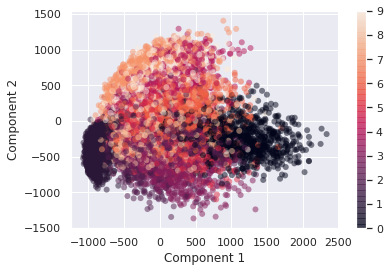

In [32]:
#Visualizing the 2 features after PCA transformation

plt.scatter(transformed_features[:, 0], transformed_features[:, 1],
            c=mnist_labels_classify, edgecolor='none', alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

From the visual representation of the PCA components above, we can reach multiple conclusions:

1. The PCA succeeded to form well identified clusters of the 10 digits using only 2 features. 
2. Although the digits are well clustered, they are not linearly separable. This means that a linear classifier may not be able to classify them correctly. However, maybe with more features (higher dimensions) the data will be linearly separable and a linear classifier can classify them. 
3. The range of the 2 components is so wide (from -1500 to 2500). Moreover, there is a difference in the range between the two components (one of them is from -1500 to 1500 and the other is from -1000 to 2500). This means that for better accuracy and computational complexity, we may need to rescale the features to be in one small range of values (as an example, we can make the range from 0 to 1 using the MinMaxScaler we have used above in the notebook). This rescaling may be crucial to some algorithms such as SVM and neural networks. 

This shows the importance of visualizing your features. It may help you to better design your machine learning pipeline. 

Now, let's use the PCA to transform the data and use 5 features after the transformation with our linear SVM classifier (we will rescale the features for the reasons mentioned above).

In [33]:
#Building and examining the pipeline of our model that consists of PCA and linear SVM classifier using only 5 components

from sklearn.pipeline import make_pipeline

#Splitting the data
Xtrain, Xtest, ytrain, ytest = train_test_split(mnist_data_classify, mnist_labels_classify, random_state=42)

#Building our model
pca = PCA(n_components=5, random_state=42) #Applying PCA
scaler = MinMaxScaler() #Scaling the features to be in the range of 0 and 1
svc = SVC(kernel='linear')
model = make_pipeline(pca, scaler, svc)

model.fit(Xtrain, ytrain) #Fitting the model with training data
yfit = model.predict(Xtest) #Predicting the testing data labels 
print(accuracy_score(ytest, yfit)) #Printing the classification accuracy achieved by the model on the testing data

0.6996


We were able to increase the classification accuracy from 0.56 using the 5 manual features to 0.69 using the 5 features extracted from the PCA. This shows that the PCA was able to improve the accuracy compared to the manual extracted features and that the PCA features able to represent the data in low number of features. However, again as we have seen with the manual features, if we will compare the 0.69 accuracy with the 0.92 accuracy of the raw 784, we will find that still there is a big difference. 

So, let's try increasing our components and checking the accuarcy. We will examine 50 components, but you can play with the number of components and check how it affects the accuracy. 

In [35]:
#Building and examining the pipeline of our model that consists of PCA and linear SVM classifier using 50 components

#Splitting the data
Xtrain, Xtest, ytrain, ytest = train_test_split(mnist_data_classify, mnist_labels_classify, random_state=42) #Splitting the data

#Building our model
pca = PCA(n_components=50, random_state=42) #Applying PCA
scaler = MinMaxScaler() #Scaling the features to be in the range of 0 and 1
svc = SVC(kernel='linear')
model = make_pipeline(pca, scaler, svc)

model.fit(Xtrain, ytrain) #Fitting the model with training data
yfit = model.predict(Xtest) #Predicting the testing data labels 
print(accuracy_score(ytest, yfit)) #Printing the classification accuracy achieved by the model on the testing data

0.928


As we can see from the accuracy result above, the PCA with only 50 components was able to reach and slightly improve the accuracy achieved with the 784 features of the raw data. The PCA with 50 components improved the accuracy from 0.9208 to 0.928. This shows that the PCA can achieve the same or better accuracy than the raw data and in less number of features. 

Now, we have shown different preprocessing and feature engineering methods. Before moving to the next part, we need to remember two important points:

1. The pipeline of your machine learning solution most of the time will require merging/combining different preprocessing and feature engineering methods together to achieve the best accuracy. And please note that a lot of methods can be used for preprocessing or feature extraction/engineering. The naming of the step or the method you are implementing depends on your objective from that method. 

2. Feature engineering is more important in classical machine learning compared to deep learning. Feature engineering may be used in a few cases with deep learning, but it way less essential or required in deep learning compared to machine learning. So, remember that the pipeline you will need to build depends on the algorithms you will choose to solve your problem.

Now, we can move to the next part which is trying to improve our classification accuracy through model selection or, in other words, choosing the algorithm that most suits our problem. 

So, let's move to model selection!

# Step 5: Model Selection for Accuracy Improvement

In all the previous parts, we have been using a linear SVM model. However, the choice of the model itself is big part of the machine learning pipeline. The choice of the best algorithm that suits the data is an essential part of the solution. Understanding the problem, the data, and the different available algorithms is important for the initial choice of the potential suitable algorithms. After determining the potential algorithms that could work with the data, you start testing them iteratively to find the best one for your problem. You can learn more about choosing the right machine learning algorithm for this article: https://medium.com/hackernoon/choosing-the-right-machine-learning-algorithm-68126944ce1f


In our case, we have been using the linear SVM classifier. Does this mean that a linear classifier is the most suitable algorithm for this problem? From the PCA visualization we have seen above, we can see nonlinearity in the data. This may show that the data could be not linearly separable and nonlinear classifier may work better. So, we can examine a nonlinear SVM model to check its performance compared to the linear SVM model. But first, based on our findings from the previous parts, we will combine different methods in our solution pipeline. We will build our pipeline by deskewing the images as a preprocessing step and applying PCA with 50 components as a feature engineering extraction step. 

So, let's build our pipeline with the linear SVM model!

In [36]:
#Building and examining the pipeline of our model that consists of PCA and linear SVM classifier using 50 components

#Splitting the data
Xtrain, Xtest, ytrain, ytest = train_test_split(mnist_data_classify_deskew, mnist_labels_classify, random_state=42)

#Building our model
pca = PCA(n_components=50, random_state=42) #Applying PCA
scaler = MinMaxScaler() #Scaling the features to be in the range of 0 and 1
svc = SVC(kernel='linear')
model = make_pipeline(pca, scaler, svc)

model.fit(Xtrain, ytrain) #Fitting the model with training data
yfit = model.predict(Xtest) #Predicting the testing data labels 
print(accuracy_score(ytest, yfit)) #Printing the classification accuracy achieved by the model on the testing data

0.9572


Combining a preprocessing method (deskewing) and feature engineering method led to the best accuracy, **0.96**, with the linear SVM model compared to all our previous trials. This shows the significance of the preprocessing and feature engineering steps and their combinations. 

Now, let's examine using a nonlinear SVM and compare it with the linear SVM model. We will an SVM model with 'rbf' kernel. 

In [37]:
#Building and examining the pipeline of our model that consists of PCA and nonlinear SVM classifier using 50 components

#Splitting the data
Xtrain, Xtest, ytrain, ytest = train_test_split(mnist_data_classify_deskew, mnist_labels_classify, random_state=42)

#Building our model
pca = PCA(n_components=50, random_state=42) #Applying PCA
scaler = MinMaxScaler() #Scaling the features to be in the range of 0 and 1
svc = SVC(kernel='rbf')
model = make_pipeline(pca, scaler, svc)

model.fit(Xtrain, ytrain) #Fitting the model with training data
yfit = model.predict(Xtest) #Predicting the testing data labels 
print(accuracy_score(ytest, yfit)) #Printing the classification accuracy achieved by the model on the testing data

0.9772


So, we can see that the change of the model improved the accuracy by 2% from **0.96 to 0.98**. Such a significant increase is only caused by picking a nonlinear model that is more suitable for our data compared to a linear model. You can also try to change the kernel or the parameters of the SVM model and check their effect on the accuracy. 

Now, we know that a nonlinear classifier is more suitable for this data. So, let's try another nonlinear classifier such as the KNN classifier. 

In [52]:
#Building and examining the pipeline of our model that consists of PCA and KNN classifier using 50 components

from sklearn.neighbors import KNeighborsClassifier

#Splitting the data
Xtrain, Xtest, ytrain, ytest = train_test_split(mnist_data_classify_deskew, mnist_labels_classify, random_state=42)

#Building our model
pca = PCA(n_components=50, random_state=42) #Applying PCA
scaler = MinMaxScaler() #Scaling the features to be in the range of 0 and 1
knn = KNeighborsClassifier(3)
model = make_pipeline(pca, scaler, knn)

model.fit(Xtrain, ytrain) #Fitting the model with training data
yfit = model.predict(Xtest) #Predicting the testing data labels 
print(accuracy_score(ytest, yfit)) #Printing the classification accuracy achieved by the model on the testing data

0.966


The result above shows that the KNN succeeded in solving the problem with high accuracy (~0.97) as a nonlinear classifier, but it did not surpass the nonlinear SVM classifier. 

Multiple other nonlinear algorithm can be examined with different parameters and combinations of preprocessing and feature engineering methods. You can try any of them and check if can improve the accuracy. The links below show the accuracies achieved by the different algorithms and preprocessing and feature engineering methods:  

*   http://yann.lecun.com/exdb/mnist/index.html
*   https://paperswithcode.com/sota/image-classification-on-mnist

You can note from the above links that neural networks were able to achieve the best accuracies compared to the other conventional algorithms. So, you can check the above links and try to build your own solution.  



# Summary

In this notebook, we have shown an overview the general pipeline to be followed in solving a machine learning problem. We have discussed data exploration, building baseline model, data preprocessing, feature engineering, and model selection. You can use the links included in the notebook for further information about each one of these topics. 

One last thing that was not mentioned in this notebook and is an important part of the pipeline is the choice of the evaluation metric for your problem. There are multiple of evaluation metrics that can be used, so you need to choose the evaluation metric that will better represent the success of your model in solving your problem. You can know more about this topic from this article: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

I wish you the best with your coming machine learning model! :) 